In [1]:
# importing libraries 
# TODO -> Use module for scripts 
import numpy as np
import pandas as pd 
import dataexp as dtex # our code
import dataio as dtio # our code 
import preprocessing as pre # our code 
from IPython.display import display
from collections import OrderedDict

%matplotlib inline
extensions = ".arff"

path = "data/"
year_headers = ["1_year" , "2_year", "3_year" , "4_year", "5_year"]

# save imputation data if files dont exists + retrieve
imp_common_path = path + "imputation"

# get files with .arff extension in path specified
files_path = dtio.file_paths(path, extensions)
# converts .arff files to dataframes 
df_years = dtio.arff2df(files_path, True) 

# create column names 
columns_name = []
for i in range(df_years[0][1].shape[1] - 1):
    columns_name.append("x" + str(i + 1))
columns_name.append("outcome")


def format_dict_dfs(dict_dfs, col_names ,verbose = False):
    for i in range(len(dict_dfs)):
        dict_dfs[i][1].columns = col_names 
        dict_dfs[i][1][col_names[:-1]] = dict_dfs[i][1][col_names[:-1]].apply(pd.to_numeric)
        dict_dfs[i][1]["outcome"] = dict_dfs[i][1]["outcome"].astype("category").cat.codes

        if(verbose == True):
            print("Path: {0}, Shape: {1}".format(dict_dfs[i][0], dict_dfs[i][1].shape))


# mean imputation
imp_mean_path = imp_common_path + "_mean/"
imp_mean_dfs = dtio.arff2df(dtio.file_paths(imp_mean_path, extensions), True)  
format_dict_dfs(imp_mean_dfs, columns_name, True)

imp_dfs_dict = OrderedDict()
imp_dfs_dict["Mean"] = [x[1] for x in imp_mean_dfs]

Path: data/imputation_mean/1_year.arff, Shape: (7027, 65)
Path: data/imputation_mean/2_year.arff, Shape: (10173, 65)
Path: data/imputation_mean/3_year.arff, Shape: (10503, 65)
Path: data/imputation_mean/4_year.arff, Shape: (9792, 65)
Path: data/imputation_mean/5_year.arff, Shape: (5910, 65)


,label_0,label_1,minortiy_label,minority_percentage
0,6756.0,271.0,1.0,0.038566


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x56,x57,x58,x59,x60,x61,x62,x63,x64,outcome
0,-7485.472449,2304.106753,339129.520761,21782.461994,-822.720903,504.486253,-217.180884,-109.246473,-416.591366,-19.338635,...,0.017402,0.001392,0.004966,0.008624,0.002915,-0.000785,-0.000025,2.369864e-11,-1.236137e-10,0
1,-7245.288021,1141.421027,-6489.661344,-1203.386793,-1244.105094,-18.022732,-434.214544,-189.746623,16.206910,-106.847352,...,0.019446,-0.007213,-0.020862,0.016377,0.008479,0.000590,-0.000052,-5.778828e-12,-6.594432e-12,0
2,-7266.059059,1035.653345,-2473.513830,-891.506727,-1240.616493,-22.091029,-430.890431,-246.377673,-165.026457,-52.419546,...,0.030720,-0.016384,-0.073197,0.005043,0.021962,-0.001397,-0.000037,3.881539e-11,2.036415e-10,0
3,-7283.147951,968.811293,11711.801696,-0.875641,-1305.196396,-82.076012,-422.345699,-239.754628,-28.667502,-132.180760,...,0.004430,-0.006506,0.010776,0.002950,0.005064,0.001867,-0.000018,3.394903e-12,1.479560e-11,0
4,-7290.742014,695.114523,-5612.010479,-1091.959100,-1330.009609,-97.417620,-431.198054,-245.102264,-148.256879,-86.694981,...,0.018052,-0.020261,-0.003080,-0.009858,-0.010788,0.001013,-0.000073,-3.978092e-12,-4.819171e-11,0


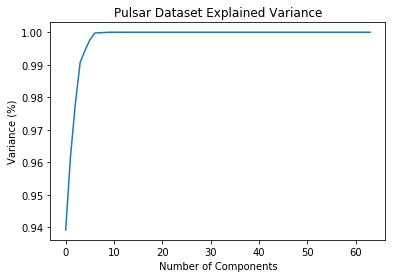

[9.39157686e-01 2.26194782e-02 1.61505591e-02 1.27784749e-02
 3.70088007e-03 3.22900443e-03 2.08455276e-03 1.26899606e-04
 7.52146619e-05 7.05715806e-05 3.13599851e-06 1.59880737e-06
 1.01618639e-06 4.11544096e-07 2.52065335e-07 1.84463751e-07
 6.29722228e-08 4.34405575e-09 3.65682683e-09 2.19324314e-09
 2.10923416e-09 1.48800381e-09 7.99800843e-10 6.84409919e-10
 5.42536392e-10 3.08981303e-10 1.30410443e-10 1.22227093e-10
 1.08927696e-10 1.03763755e-10 5.08392701e-11 4.73944057e-11
 2.85366822e-11 2.70098167e-11 2.18274168e-11 1.07213152e-11
 8.79247517e-12 6.75347407e-12 4.37997574e-12 3.96448641e-12
 3.40610079e-12 3.25901009e-12 2.63184886e-12 2.19472733e-12
 1.21455877e-12 1.16349534e-12 1.14918240e-12 1.07482894e-12
 8.47354340e-13 4.18471228e-13 3.25276522e-13 2.86869096e-13
 7.83473247e-14 6.00468320e-14 5.08952668e-14 4.37285431e-14
 1.50918911e-14 1.39852650e-14 5.96705250e-15 4.10584491e-15
 4.58799761e-17 8.81240913e-18 8.35691060e-33 8.35691060e-33]


,label_0,label_1,minortiy_label,minority_percentage
0,6756.0,271.0,1.0,0.038566


In [2]:
import feature_extraction as fe 
import matplotlib.pyplot as plt


imbalanced_stats_df = dtex.imbalanced_stats(imp_dfs_dict["Mean"][0], 'outcome')
display(imbalanced_stats_df)

reduced_test, pca_instance = fe.pca_reduction(imp_dfs_dict["Mean"][0] ) 
display(reduced_test[0].head())

plt.figure()
plt.plot(np.cumsum(pca_instance.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Pulsar Dataset Explained Variance')
plt.show()

print(pca_instance.explained_variance_ratio_)


imbalanced_stats_df = dtex.imbalanced_stats(reduced_test, 'outcome')
display(imbalanced_stats_df)

In [3]:
from sklearn.model_selection import train_test_split
import model_validation as mv

X = imp_dfs_dict["Mean"][0].iloc[:,0:-1]
X = X.apply(pre.scale_range, args = (0,1), axis = 0).values
y = imp_dfs_dict["Mean"][0]["outcome"].values

In [4]:
from sklearn.feature_selection import RFE
from logistic_regression import LogisticRegression

log_reg = LogisticRegression(alpha = 0.01, lambda_t = 0.1)
selector = RFE(log_reg, 29, step= 0.1)
selector = selector.fit(X, y)

print(selector.support_)
#.fit(X, y)

[ True False  True False  True  True  True False False  True  True False
 False  True  True False False  True  True False False  True  True  True
  True False False  True  True False  True False False  True  True False
 False  True  True False False  True False False  True False False  True
  True False False False False False False  True  True False  True False
 False False False False]


In [6]:
import feature_extraction as fe 

column_key = imp_dfs_dict["Mean"][0].columns[0:-1]
feature_rfe_ranko, feature_rfe_columns = fe.rfe_ranking(X, y, log_reg, 29, column_key)

In [9]:
print(selector.ranking_)
print(feature_rfe_columns)

# print all feature chi score 
for i in range(len(feature_rfe_ranko)):
    print("{0}: {1}".format(feature_rfe_ranko[i][0], round(feature_rfe_ranko[i][1], 4)))



[1 2 1 6 1 1 1 3 5 1 1 3 3 1 1 2 5 1 1 7 3 1 1 1 1 3 4 1 1 6 1 4 4 1 1 5 5
 1 1 2 3 1 7 7 1 2 5 1 1 4 4 5 6 6 2 1 1 7 1 7 6 7 4 6]
['x20', 'x43', 'x44', 'x58', 'x60', 'x62', 'x4', 'x30', 'x53', 'x54', 'x61', 'x64', 'x9', 'x17', 'x36', 'x37', 'x47', 'x52', 'x27', 'x32', 'x33', 'x50', 'x51', 'x63', 'x8', 'x12', 'x13', 'x21', 'x26', 'x41', 'x2', 'x16', 'x40', 'x46', 'x55', 'x1', 'x3', 'x5', 'x6', 'x7', 'x10', 'x11', 'x14', 'x15', 'x18', 'x19', 'x22', 'x23', 'x24', 'x25', 'x28', 'x29', 'x31', 'x34', 'x35', 'x38', 'x39', 'x42', 'x45', 'x48', 'x49', 'x56', 'x57', 'x59']
x20: 7
x43: 7
x44: 7
x58: 7
x60: 7
x62: 7
x4: 6
x30: 6
x53: 6
x54: 6
x61: 6
x64: 6
x9: 5
x17: 5
x36: 5
x37: 5
x47: 5
x52: 5
x27: 4
x32: 4
x33: 4
x50: 4
x51: 4
x63: 4
x8: 3
x12: 3
x13: 3
x21: 3
x26: 3
x41: 3
x2: 2
x16: 2
x40: 2
x46: 2
x55: 2
x1: 1
x3: 1
x5: 1
x6: 1
x7: 1
x10: 1
x11: 1
x14: 1
x15: 1
x18: 1
x19: 1
x22: 1
x23: 1
x24: 1
x25: 1
x28: 1
x29: 1
x31: 1
x34: 1
x35: 1
x38: 1
x39: 1
x42: 1
x45: 1
x48: 1
x49: 1
x56: 1
x57: